# Laporan Akhir

- Cari dataset lain untuk kasus klasifikasi dan regresi. Lakukan pre-processing data jika diperlukan.
- Tuliskan sumber dataset yang anda pakai.
- Jelaskan secara singkat mengenai isi dari dataset tersebut.
- Cari nilai $k$ terbaik dengan cross validation, untuk kedua kasus tersebut.
- Gunakan nilai $k$ terbaik tersebut lalu itung performance dari hasil prediksi. Gunakan metrik yang sesuai.
- Tulis kesimpulan

Note : Mohon untuk memberikan keterangan dari setiap kolom kode yang dijalankan pada file .ipynb


# Dataset

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Dataset ini berisi Pendapatan tahunan seseorang yang dihasilkan dari berbagai faktor. Secara intuitif dipengaruhi oleh tingkat pendidikan individu, usia, jenis kelamin, pekerjaan, dan lain-lain.

Usability = 5.88

In [ ]:
# Load libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('adult.csv')

# Tampilkan 5 data pertama
df.head(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# EDA

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Cek apakah terdapat duplicate value

In [ ]:
print(f"{df.duplicated().sum()} duplicate values")

52 duplicate values


Ternyata dalam dataset saya terdapat 52 duplicate value

In [ ]:
df = df.drop_duplicates()

print(f"Setelah melakukan drop duplicate value, sekarang saya memiliki {df.duplicated().sum()} duplicate values")

Setelah melakukan drop duplicate value, sekarang saya memiliki 0 duplicate values


Kode diatas digunakan untuk melakukan drop duplicate value, dan sekarang dalam dataset saya tidak terdapat duplicate value

In [ ]:
df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


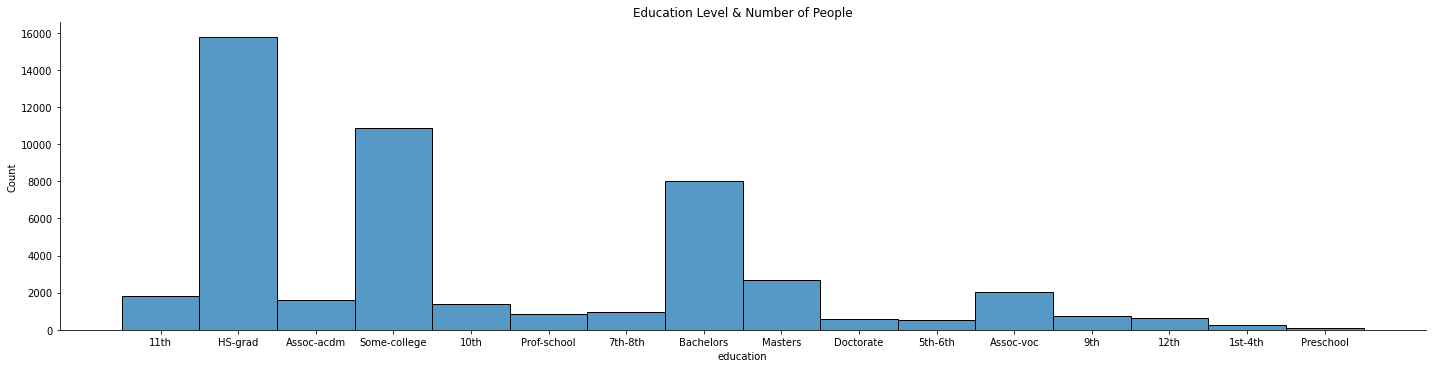

In [ ]:
sns.displot(x=df['education'], aspect=4)
plt.title('Education Level & Number of People')
plt.show()

# Encoding
Pertama saya akan melakukan encoding. encoding sendiri berfungsi untuk merubah data kategorikal menjadi numerik, karena machine learning tidak mengerti string dan hanya bisa menggunakan data numerik. KNN membutuhkan nilai int/ float untuk menghitung jarak antara titik kueri dan titik lainnya. sedangkan dataset yang saya punya memiliki banyak kolom yang kemungkinan tidak akan memengaruhi pendapatan seseorang seperti status perkawinan, jenis kelamin, dll. Jadi, saya menghapus kolom yang tidak diperlukan tersebut. Kolom yang tersisa akan tetap memiliki nilai string. Dan nilai string tidak dapat dikonversi menjadi float.oleh karena itu saya menetapkan nilai integer yang berbeda untuk setiap nilai string yang berbeda.

In [ ]:
df['income'] = df['income'].replace('<=50K', 0)
df['income'] = df['income'].replace('>50K', 1)
df['workclass'] = df['workclass'].replace('Private', 1)
df['workclass'] = df['workclass'].replace('Local-gov', 2)
df['workclass'] = df['workclass'].replace('?', 0)
df['workclass'] = df['workclass'].replace('Federal-gov', 3)
df['workclass'] = df['workclass'].replace('Self-emp-not-inc', 4)
df['workclass'] = df['workclass'].replace('State-gov', 5)
df['workclass'] = df['workclass'].replace('Self-emp-inc', 6)
df['workclass'] = df['workclass'].replace('Without-pay', 0)
df['workclass'] = df['workclass'].replace('Never-worked', 0)
df = df.drop(columns = ['educational-num', 'marital-status', 'relationship', 'race', 'native-country'])

In [ ]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 2)
df

,age,workclass,fnlwgt,education,occupation,gender,capital-gain,capital-loss,hours-per-week,income
0,25,1,226802,11th,Machine-op-inspct,1,0,0,40,0
1,38,1,89814,HS-grad,Farming-fishing,1,0,0,50,0
2,28,2,336951,Assoc-acdm,Protective-serv,1,0,0,40,1
3,44,1,160323,Some-college,Machine-op-inspct,1,7688,0,40,1
4,18,0,103497,Some-college,?,2,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...
48837,27,1,257302,Assoc-acdm,Tech-support,2,0,0,38,0
48838,40,1,154374,HS-grad,Machine-op-inspct,1,0,0,40,1
48839,58,1,151910,HS-grad,Adm-clerical,2,0,0,40,0
48840,22,1,201490,HS-grad,Adm-clerical,1,0,0,20,0


In [ ]:
df['education'] = df['education'].replace('1st-4th', "SD")
df['education'] = df['education'].replace('5th-6th', "SD")
df['education'] = df['education'].replace('7th-8th', "SMP")
df['education'] = df['education'].replace('9th', "SMP")
df['education'] = df['education'].replace('10th', "SMP")
df['education'] = df['education'].replace('11th', "SMA")
df['education'] = df['education'].replace('12th', "SMA")
df['education'] = df['education'].replace('HS-grad', "SMA")
df['education'] = df['education'].replace('Assoc-acdm', "Assot")
df['education'] = df['education'].replace('Assoc-voc', "Assot")


In [ ]:
df['education'] = df['education'].replace('Preschool',0)
df['education'] = df['education'].replace('SD',1)
df['education'] = df['education'].replace('SMP',2)
df['education'] = df['education'].replace('SMA',3)
df['education'] = df['education'].replace('Some-college',4)
df['education'] = df['education'].replace('Assot',5)
df['education'] = df['education'].replace('Bachelors',6)
df['education'] = df['education'].replace('Masters',7)
df['education'] = df['education'].replace('Doctorate',8)
df['education'] = df['education'].replace('Prof-school',9)
df = df.drop(columns = 'occupation')
df.head()

,age,workclass,fnlwgt,education,gender,capital-gain,capital-loss,hours-per-week,income
0,25,1,226802,3,1,0,0,40,0
1,38,1,89814,3,1,0,0,50,0
2,28,2,336951,5,1,0,0,40,1
3,44,1,160323,4,1,7688,0,40,1
4,18,0,103497,4,2,0,0,30,0


# Cross Validation
Disini saya akan menggunakan fungsi Cross Validation untuk mencari atau mendapatkan nilai K paling Optimum. Sebagai catatan disini saya menggunakan nilai  k = 10  sebagai hyperparameter dan menggunakan scikit-learn untuk membantu melakukan K-fold cross validation.

In [ ]:
X = df.drop('income', axis = 1)
y = df['income']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import KFold

K = 10
n_fold = 10

def cross_val_error(X, Y, k=K, k_kfold=n_fold):
  kf = KFold(n_splits=k_kfold)
  kf.get_n_splits(X)

  knn = KNeighborsClassifier(n_neighbors = k)
  
  total_error = 0
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)
    error = np.sum(y_pred != y_test) / float(y_test.size)
    total_error = total_error + error

  return total_error/k_kfold
print("average error: ", cross_val_error(X,Y))


average error:  0.20321787251485962


setelah melakukan fungsi menghitung rata-rata error tiap set validasi dari KFold ccross validation menggunakan scikit-learn di cell atas, sehingga sekarang saya tinggal menjalankan fungsi tersebut dengan nilai  k  yang berbeda. Saya visualisasikan error yang didapat ketika nilai  k  bervariasi dari 1 sampai dengan 25.

best at k =  24


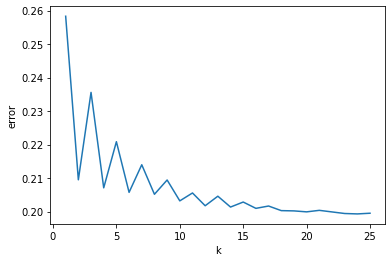

In [ ]:
error_k = [cross_val_error(X,Y,k) for k in np.arange(1,26)]
plt.plot(np.arange(1,26),error_k)
plt.xlabel("k")
plt.ylabel("error")
print("best at k = ",np.argmin(error_k)+1)

Dari hasil visualisasi diatas didapatkan nilai K paling optimum atau memiliki error paling kecil adalah 25

In [ ]:
model = KNeighborsClassifier(n_neighbors = 25)

Kemudian disini saya menggunakan nilai K tersebut untuk memprediksi score

In [ ]:
model.fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.score(X, y)

0.8054519368723099

hasil score yang didapatkan dengan menggunakan K = 25

In [ ]:
final_model1 = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan').fit(X, y)
final_model1.score(X, y)

0.8174625947940152

Hasil score yang didapatkan ketika menggunakan distance metric 'Manhattan'

In [ ]:
final_model1 = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean').fit(X, y)
final_model1.score(X, y)

0.8146751383480222

Hasil score yang didapatkan ketika menggunakan distance metric 'Euclidean'

In [ ]:
final_model1 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1).fit(X, y)
final_model1.score(X, y)

0.8174625947940152

Hasil score yang didapatkan dengan menggunakan distance metric 'Minkowski', Ketika menggunakan p = 1 maka score yang dihasilkan sama dengan score 'Manhattan' karena ketika P = 1 Minkowski merupakan generalisasi dari distance metric 'Manhattan'

In [ ]:
final_model1 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2).fit(X, y)
final_model1.score(X, y)

0.8146751383480222

Hasil score yang didapatkan dengan menggunakan distance metric 'Minkowski', Ketika menggunakan P = 2 maka score yang dihasilkan sama dengan score 'Euclidean' karena ketika P = 2 Minkowski merupakan generalisasi dari distance metric 'Euclidean'

# Kesimpulan
Dengan menggunakan K = 25 saya mendapatkan skor 0.8054 atau 80.54%. Namun dengan menggunakan distance metric 'Euclidean' saya mendapatkan skor 0.8146 atau 81.46%, dan skor 0.8174 atau 81.74% dengan menggunakan distance metric 'Manhattan'. Hasil score yang didapatkan dengan menggunakan distance metric 'Minkowski', Ketika menggunakan p = 1 maka score yang dihasilkan sama dengan score 'Manhattan' karena ketika P = 1 Minkowski merupakan generalisasi dari distance metric 'Manhattan'. Dan terakhir Hasil score yang didapatkan dengan menggunakan distance metric 'Minkowski', Ketika menggunakan P = 2 maka score yang dihasilkan sama dengan score 'Euclidean' karena ketika P = 2 Minkowski merupakan generalisasi dari distance metric 'Euclidean'